In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils
import ELPH_Scaler
import ELPH_Optimizer

from ELPH_NVAR import SVDNVAR

In [2]:
#Careful. At the moment the different MG runs are correlated! Have to rewrite the MG simulation python script!
runs, number_batches, number_features_in_delay, number_samples_in_batch = ELPH_utils.load_MG()
print(np.shape(runs))

runs = np.reshape(runs, (number_batches,number_features_in_delay,number_samples_in_batch))
print(np.shape(runs))

FileNotFoundError: [Errno 2] No such file or directory: '../MG.txt'

rdim:  20
n_VAR_steps:  2
NVAR_p:  2
VAR state shape:  (40, 4990)
NVAR state shape:  (861, 4990)
target shape:  (30, 4990)
weights shape:  (861, 30)


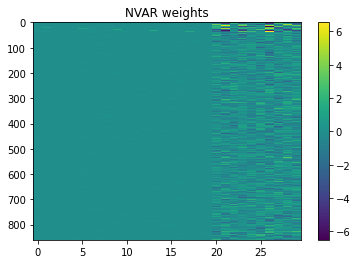

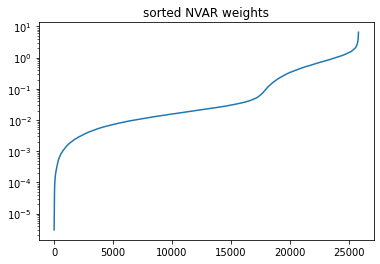

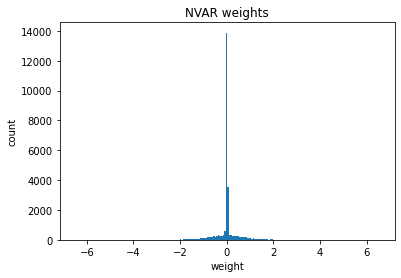

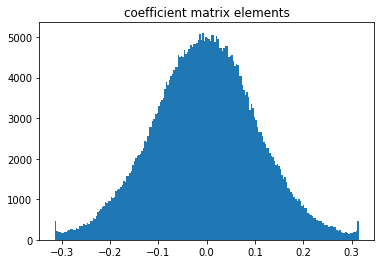

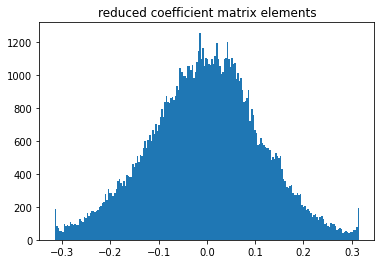

In [22]:
optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.43)

# scaler = ELPH_Scaler.standardize_scaler()
scaler = ELPH_Scaler.normalize_scaler(0.63)
# scaler = ELPH_Scaler.tanh_scaler(arg_scale=1.0, out_scale=0.3)

NVAR = SVDNVAR(runs)
NVAR.train(rdim=20, prdim = 30, n_VAR_steps=2, NVAR_p=2, intercept=True, optimizer=optimizer, scaler=scaler)
NVAR.print_status()

plt.imshow(NVAR.w, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('NVAR weights')
plt.show()

plt.semilogy(np.sort(np.ravel(np.abs(NVAR.w))))
plt.title('sorted NVAR weights')
plt.show()

plt.hist(np.ravel(NVAR.w), bins=200)
plt.title('NVAR weights')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

plt.hist(np.ravel(NVAR.coef_matrix), bins=200)
plt.title('coefficient matrix elements')
plt.show()

plt.hist(np.ravel(NVAR.coef_matrix[:NVAR.rdim]), bins=200)
plt.title('reduced coefficient matrix elements')
plt.show()

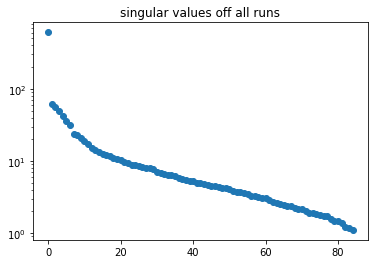

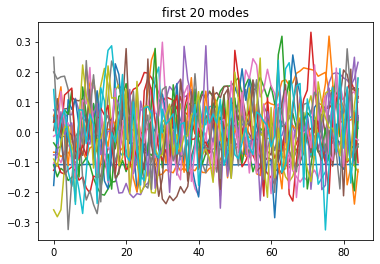

In [23]:
plt.semilogy(NVAR.S, 'o')
plt.title('singular values off all runs')
plt.show()
 
for l in range(NVAR.rdim):
  plt.plot(NVAR.U[:,l],  label='U_'+str(l))
plt.title('first ' + str(NVAR.rdim) + ' modes')
plt.show()

In [27]:
optimizer = ELPH_Optimizer.ridge(alpha=10.**1)
scaler = ELPH_Scaler.normalize_scaler(0.63)

train_kwargs = {'rdim':20, 'prdim':30, 'n_VAR_steps':2, 'NVAR_p':2, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler}
score_kwargs = {'norm':'max', 'errSVD':False}

m,s = ELPH_utils.get_KFold_CV_scores(NVAR, runs, folds=5, seed=817, score_kwargs=score_kwargs, train_kwargs=train_kwargs)
print(m)
print(np.std(s))
print(s)

0.5604045094452557
0.004283509754917462
[0.564938402054706, 0.5599920340922558, 0.5643895961124763, 0.5530137927035312, 0.5596887222633091]


In [28]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils
import ELPH_Scaler
import ELPH_Optimizer

from ELPH_ELM import SVDELM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
optimizer = ELPH_Optimizer.ridge(alpha=10.**-3.43)

# scaler = ELPH_Scaler.standardize_scaler()
scaler = ELPH_Scaler.normalize_scaler(0.63)
# scaler = ELPH_Scaler.tanh_scaler(arg_scale=1.0, out_scale=0.3)

ELM = SVDELM(runs)
ELM.train(rdim=20, prdim = 30, n_VAR_steps=2, ELM_nodes=500, intercept=True, optimizer=optimizer, scaler=scaler)
ELM.print_status()

rdim:  20
n_VAR_steps:  2
ELM_nodes:  500
ELM_weights_mean:  0.0
ELM_weights_std:  1.0
VAR state shape:  (40, 4990)
ELM state shape:  (541, 4990)
target shape:  (30, 4990)
weights shape:  (541, 30)


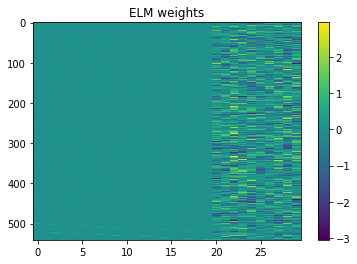

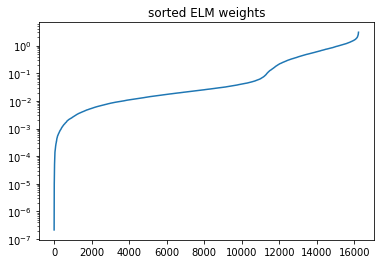

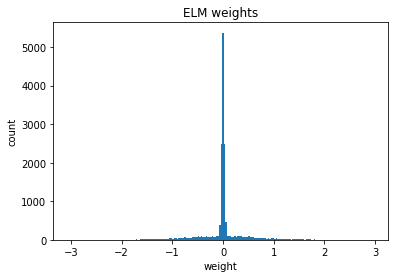

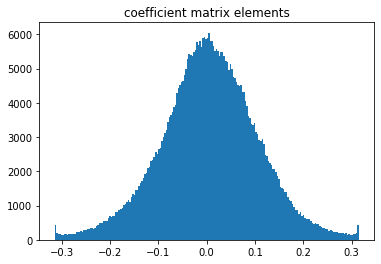

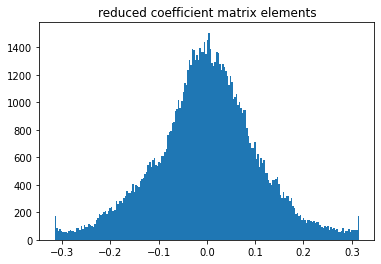

In [16]:
plt.imshow(ELM.w, aspect='auto', interpolation='none')
plt.colorbar()
plt.title('ELM weights')
plt.show()

plt.semilogy(np.sort(np.ravel(np.abs(ELM.w))))
plt.title('sorted ELM weights')
plt.show()

plt.hist(np.ravel(ELM.w), bins=200)
plt.title('ELM weights')
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

plt.hist(np.ravel(ELM.coef_matrix), bins=200)
plt.title('coefficient matrix elements')
plt.show()

plt.hist(np.ravel(ELM.coef_matrix[:ELM.rdim]), bins=200)
plt.title('reduced coefficient matrix elements')
plt.show()

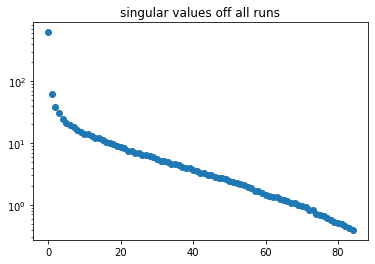

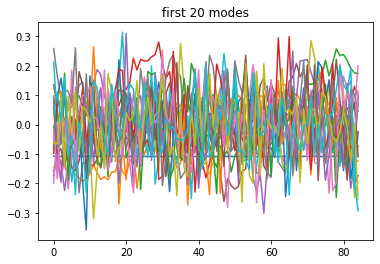

In [17]:
plt.semilogy(ELM.S, 'o')
plt.title('singular values off all runs')
plt.show()
 
for l in range(ELM.rdim):
  plt.plot(ELM.U[:,l],  label='U_'+str(l))
plt.title('first ' + str(ELM.rdim) + ' modes')
plt.show()

In [33]:
optimizer = ELPH_Optimizer.ridge(alpha=10.**0)
scaler = ELPH_Scaler.normalize_scaler(1.0)

train_kwargs = {'rdim':20, 'prdim':30, 'n_VAR_steps':2, 'ELM_nodes':1000,  'ELM_weights_mean':0.0, 'ELM_weights_std':1.0, 'intercept':True, 'full_hist':False, 'optimizer':optimizer, 'scaler':scaler}
score_kwargs = {'norm':'max', 'errSVD':False}

m,s = ELPH_utils.get_KFold_CV_scores(ELM, runs, folds=5, seed=817, score_kwargs=score_kwargs, train_kwargs=train_kwargs)
print(m)
print(np.std(s))
print(s)

1.9572337866248772
0.7118805940261934
[1.1752668874796255, 1.57029663074837, 1.7874547832823982, 1.9754930508638078, 3.277657580750186]
